<a href="https://colab.research.google.com/github/NaufalSyahandra/Machine_Learning_2024/blob/master/kuis1_boilerplate_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 1 PEMBELAJARAN MESIN
Klasifikasi SVM Pada Data Citra

Nama Kelompok:
1. Mohamamd Naufal Syahandra / 2241720189
2. Dido Imam Padmanegara /2241720111
3. Ellois Karina Handoyo / 2241720154
4. Irshandy Aditya Wicaksana / 2241720148
# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (extra 20 points)
- Menggunakan model lain selain SVM (extra 10 points)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (extra 20 points)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [11]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [12]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=150, color=True)

# Check Faces
print(f'person names: {faces.target_names}')
print(f'number of classes or person: {len(faces.target_names)}')
print(f'data shape: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

person names: ['Colin Powell' 'George W Bush']
number of classes or person: 2
data shape: (766, 62, 47, 3)
Images flatten dimension: (766, 8742)


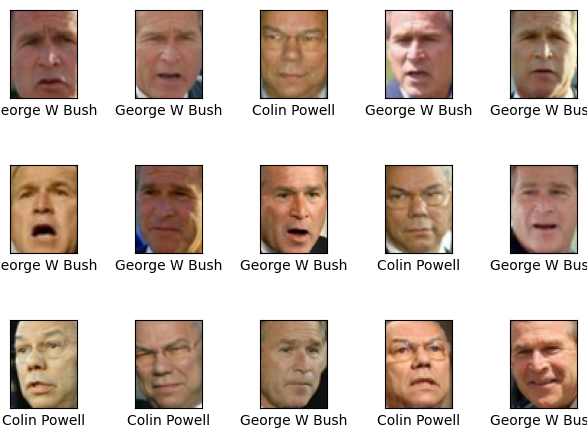

In [13]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [14]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''
# Preprocessing the data

# Preprocessing: normalize the pixel values to range between 0 and 1
X = faces.data / 255.0  # Standardization (scaling pixel values)
y = faces.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes after splitting
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (612, 8742)
Testing data shape: (154, 8742)


# Features Extraction

In [15]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

 # Extract histogram features for each channel (RGB)
def extract_histogram_features(images, bins=256):
    features = []
    for img in images:
        # Split the image into its R, G, B channels
        red_channel = img[:, :, 0]
        green_channel = img[:, :, 1]
        blue_channel = img[:, :, 2]

        # Calculate histograms for each channel
        hist_r, _ = np.histogram(red_channel, bins=bins, range=(0, 256))
        hist_g, _ = np.histogram(green_channel, bins=bins, range=(0, 256))
        hist_b, _ = np.histogram(blue_channel, bins=bins, range=(0, 256))

        # Concatenate histograms for all channels
        hist_features = np.concatenate([hist_r, hist_g, hist_b])
        features.append(hist_features)

    return np.array(features)

# Apply feature extraction
X_histogram_features = extract_histogram_features(faces.images)

# Build Model

In [16]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

# Build the SVM model
model = SVC(kernel='rbf', class_weight='balanced')  # Using RBF kernel and balancing class weights

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {acc}")

Testing Accuracy: 0.9155844155844156


# Evaluation

=== Training Data Evaluation ===
Training Accuracy: 0.9517543859649122
Training Classification Report:
                    precision    recall  f1-score   support

     Colin Powell       0.95      0.97      0.96       186
  Donald Rumsfeld       0.88      1.00      0.94        96
    George W Bush       0.99      0.92      0.95       424
Gerhard Schroeder       0.89      1.00      0.94        87
       Tony Blair       0.93      0.97      0.95       119

         accuracy                           0.95       912
        macro avg       0.93      0.97      0.95       912
     weighted avg       0.96      0.95      0.95       912



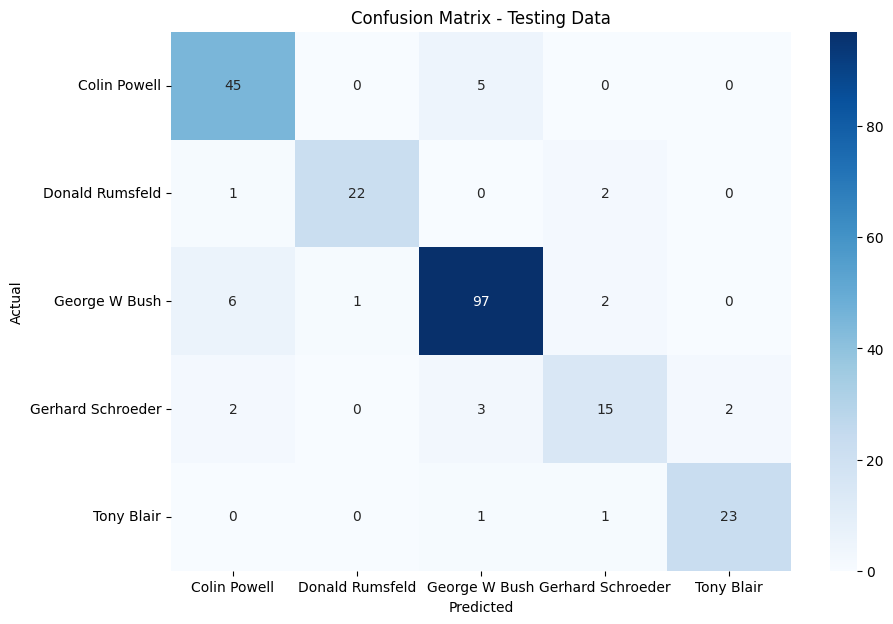

=== Testing Data Evaluation ===
Testing Accuracy: 0.8859649122807017
Testing Classification Report:
                    precision    recall  f1-score   support

     Colin Powell       0.83      0.90      0.87        50
  Donald Rumsfeld       0.96      0.88      0.92        25
    George W Bush       0.92      0.92      0.92       106
Gerhard Schroeder       0.75      0.68      0.71        22
       Tony Blair       0.92      0.92      0.92        25

         accuracy                           0.89       228
        macro avg       0.87      0.86      0.87       228
     weighted avg       0.89      0.89      0.89       228



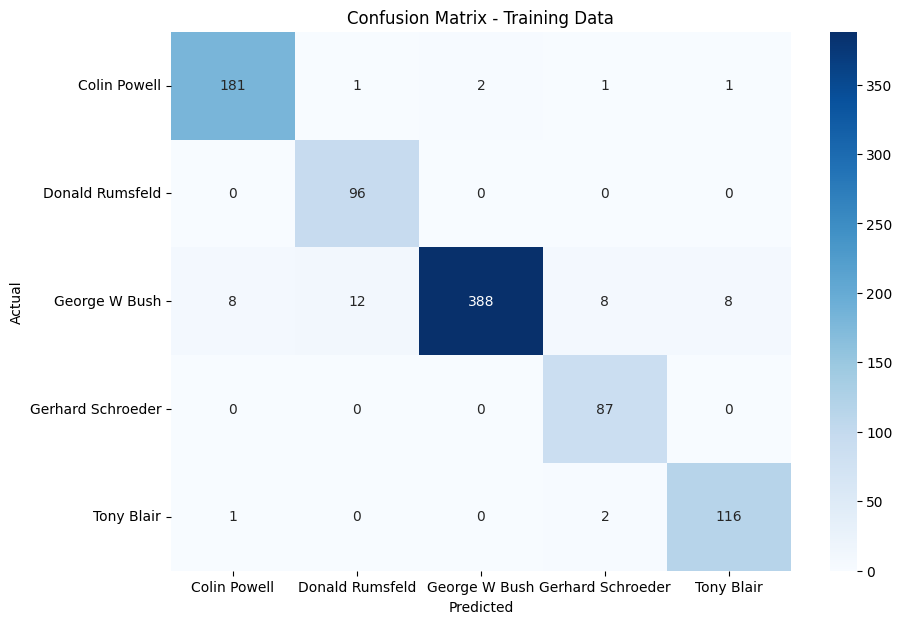

In [7]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

# Evaluation

# Evaluate model on training data
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred, target_names=faces.target_names, zero_division=0)

# Evaluate model on testing data
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred, target_names=faces.target_names, zero_division=0)

# Print evaluation results
print("=== Training Data Evaluation ===")
print(f"Training Accuracy: {train_acc}")
print("Training Classification Report:\n", train_class_report)

# Plot confusion matrix for testing data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.title("Confusion Matrix - Testing Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("=== Testing Data Evaluation ===")
print(f"Testing Accuracy: {test_acc}")
print("Testing Classification Report:\n", test_class_report)

# Plot confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Challenge

## Using Other Features Besides the Histogram

In [8]:
import cv2
from skimage.feature import hog

def extract_hog_features(images):
    features = []
    for img in images:
        # Convert the RGB image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Compute HOG features
        hog_features, _ = hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True, feature_vector=True)

        features.append(hog_features)

    return np.array(features)

# Extract HOG features
X_hog_features = extract_hog_features(faces.images)

# Print example of HOG features for the first 5 images
print("HOG features for the first 5 images:")
print(X_hog_features[:5])

HOG features for the first 5 images:
[[0.29391426 0.29391426 0.03754036 ... 0.01975715 0.05665009 0.104926  ]
 [0.45796794 0.32827115 0.00470957 ... 0.03761631 0.03715808 0.03161429]
 [0.32226875 0.32226875 0.08389615 ... 0.0112692  0.01822563 0.07385757]
 [0.26538402 0.2849355  0.2849355  ... 0.05833239 0.01323034 0.00765367]
 [0.29150882 0.29150882 0.29150882 ... 0.04808761 0.07288209 0.02861243]]


In [9]:
# Optional Feature: Mean pixel values for each channel (R, G, B)
def extract_mean_features(images):
    features = []
    for img in images:
        # Split the image into its R, G, B channels
        red_channel = img[:, :, 0]
        green_channel = img[:, :, 1]
        blue_channel = img[:, :, 2]

        # Calculate the mean of each channel
        mean_r = np.mean(red_channel)
        mean_g = np.mean(green_channel)
        mean_b = np.mean(blue_channel)

        # Concatenate means as features
        mean_features = np.array([mean_r, mean_g, mean_b])
        features.append(mean_features)

    return np.array(features)

# Extract mean features
X_mean_features = extract_mean_features(faces.images)

# Print example of extracted mean pixel values for the first 5 images
print("Mean pixel values for the first 5 images (R, G, B):")
print(X_mean_features[:5])

# Combine with histogram features
X_combined = np.hstack([X_histogram_features, X_mean_features])

# Print shape of the new combined feature set
print(f"Combined feature set shape: {X_combined.shape}")

Mean pixel values for the first 5 images (R, G, B):
[[0.7319257  0.5291574  0.4157791 ]
 [0.74820805 0.5803316  0.4729137 ]
 [0.6387824  0.41672522 0.33182877]
 [0.69437337 0.45460996 0.28486955]
 [0.6844402  0.5483158  0.4467978 ]]
Combined feature set shape: (1140, 771)


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Build RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_acc = accuracy_score(y_test, y_rf_pred)
print(f"Random Forest Accuracy: {rf_acc}")

# Print classification report
rf_class_report = classification_report(y_test, y_rf_pred, target_names=faces.target_names, zero_division=0)
print("Random Forest Classification Report:\n", rf_class_report)

Random Forest Accuracy: 0.7149122807017544
Random Forest Classification Report:
                    precision    recall  f1-score   support

     Colin Powell       1.00      0.66      0.80        50
  Donald Rumsfeld       1.00      0.44      0.61        25
    George W Bush       0.63      0.99      0.77       106
Gerhard Schroeder       0.80      0.18      0.30        22
       Tony Blair       0.83      0.40      0.54        25

         accuracy                           0.71       228
        macro avg       0.85      0.53      0.60       228
     weighted avg       0.79      0.71      0.69       228

